<a href="https://colab.research.google.com/github/rushi-k12/Forcecasting/blob/main/Airplane_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from data

In [2]:
df=pd.read_csv("/content/AirPassengers.csv")

In [3]:
df['Month']=pd.to_datetime(df['Month'])

In [4]:
data=df.set_index('Month')

In [5]:
data.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


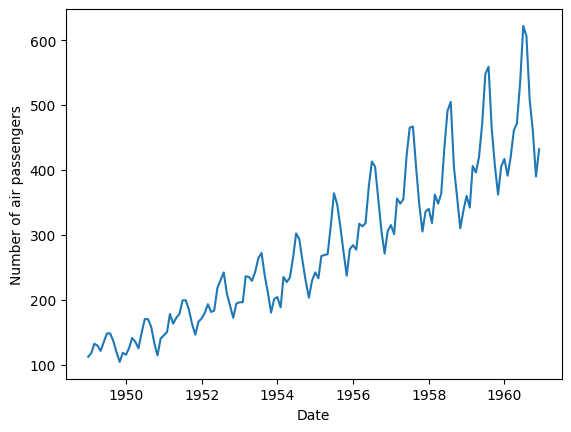

In [6]:
plt.xlabel('Date')
plt.ylabel('Number of air passengers')
plt.plot(data)

In [7]:
rollmean = data.rolling(window=12).mean()
rollstd = data.rolling(window=12).std()
print(rollmean,rollstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


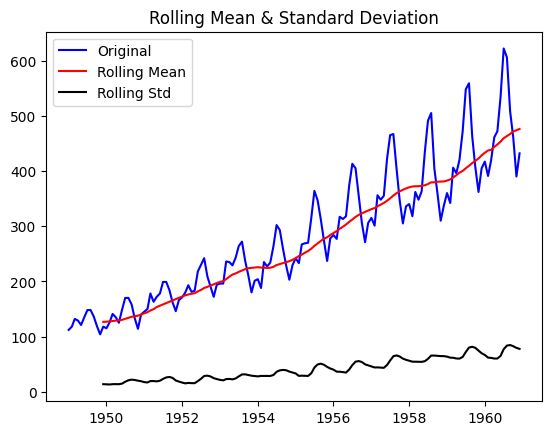

In [8]:
orig=plt.plot(data,color='blue',label='Original')
mean=plt.plot(rollmean,color='red',label='Rolling Mean')
std=plt.plot(rollstd,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [20]:
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test')
dftest=adfuller(data['#Passengers'],autolag='AIC')

dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key]=value

print(dfoutput)

Results of Dickey-Fuller Test
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


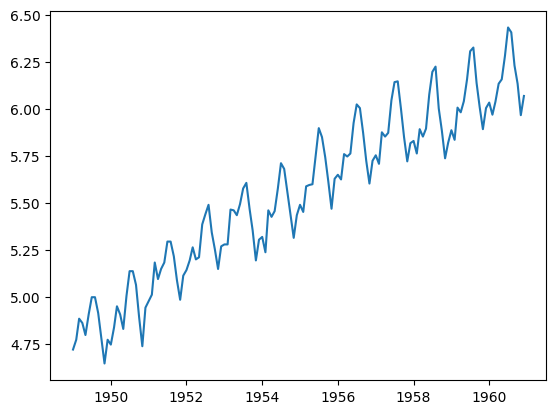

In [21]:
data_logscale = np.log(data)
plt.plot(data_logscale)

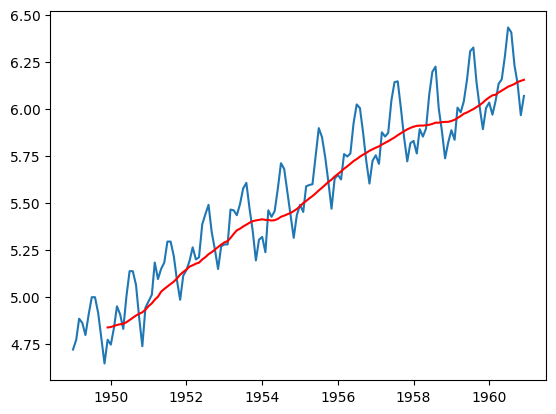

In [22]:
movingaverage=data_logscale.rolling(window=12).mean()
movingstd=data_logscale.rolling(window=12).std()
plt.plot(data_logscale)
plt.plot(movingaverage,color='red')

In [24]:
data_logscale_diff=data_logscale-movingaverage
data_logscale_diff.head(12)

data_logscale_diff.dropna(inplace=True)
data_logscale_diff.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [29]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
  movingaverage=timeseries.rolling(window=12).mean()
  movingstd=timeseries.rolling(window=12).std()

  orig=plt.plot(timeseries,color='blue',label='Original')
  mean=plt.plot(movingaverage,color='red',label='Rolling Mean')
  std=plt.plot(movingstd,color='black',label='Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show(block=False)

  print('Results of Dickey-Fuller Test')
  dftest=adfuller(timeseries['#Passengers'],autolag='AIC')
  dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
  print(dfoutput)

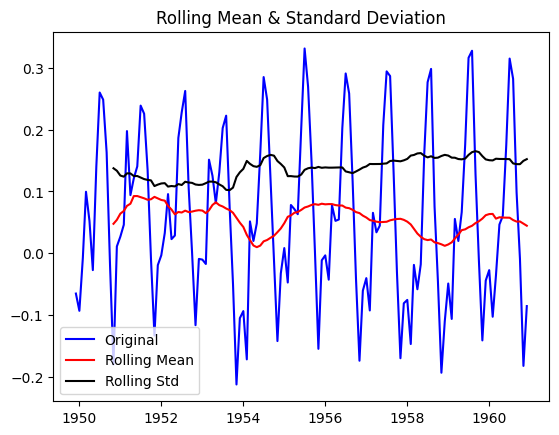

Results of Dickey-Fuller Test
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [31]:
test_stationarity(data_logscale_diff)

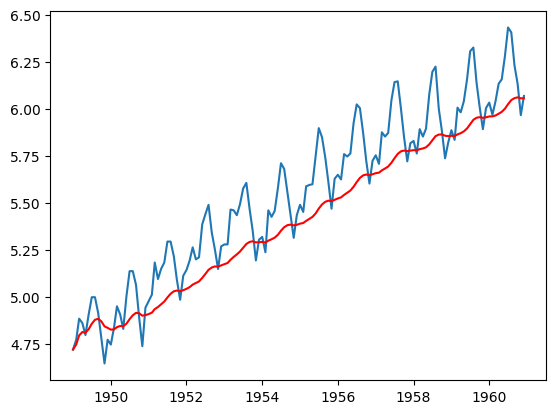

In [32]:
exponentialdecayweightedaverage=data_logscale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(data_logscale)
plt.plot(exponentialdecayweightedaverage,color='red')

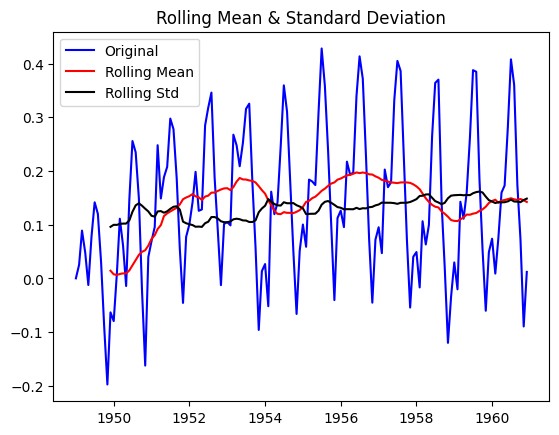

Results of Dickey-Fuller Test
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [33]:
logminusmovingaverage=data_logscale-exponentialdecayweightedaverage
test_stationarity(logminusmovingaverage)

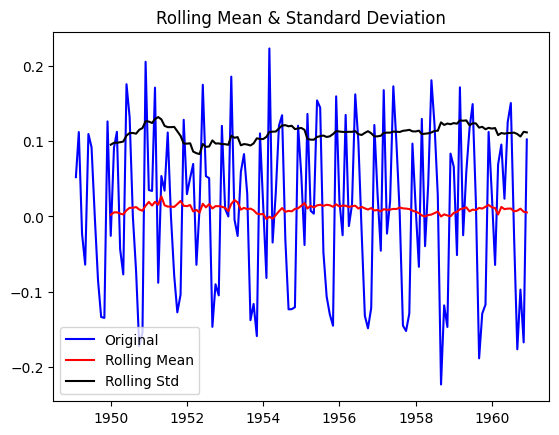

Results of Dickey-Fuller Test
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [34]:
logdiffshifting =  data_logscale-data_logscale.shift()
logdiffshifting.dropna(inplace=True)
test_stationarity(logdiffshifting)

<function matplotlib.pyplot.show(close=None, block=None)>

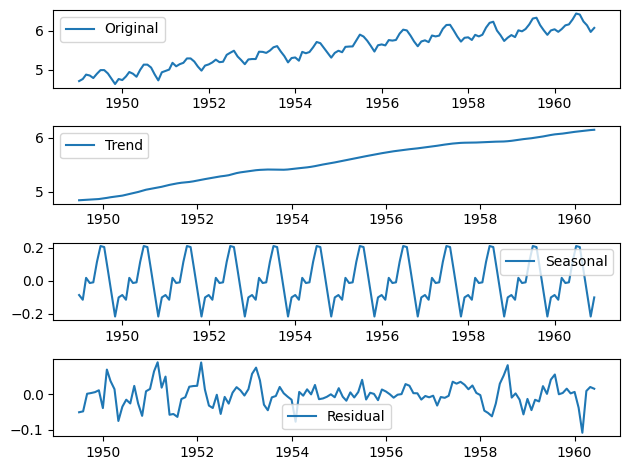

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data_logscale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(data_logscale,label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout()
plt.show

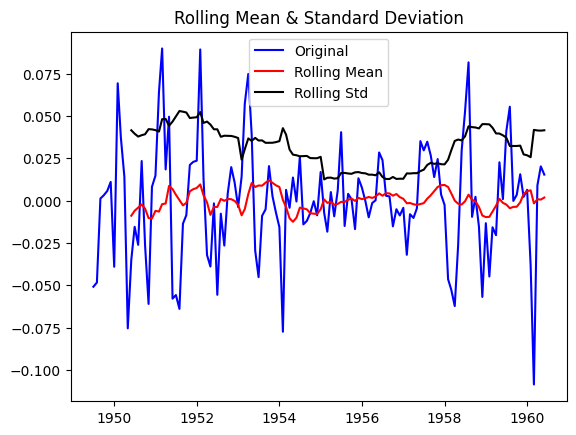

Results of Dickey-Fuller Test


KeyError: '#Passengers'

In [37]:
decomposedlogdata=residual
decomposedlogdata.dropna(inplace=True)
test_stationarity(decomposedlogdata)

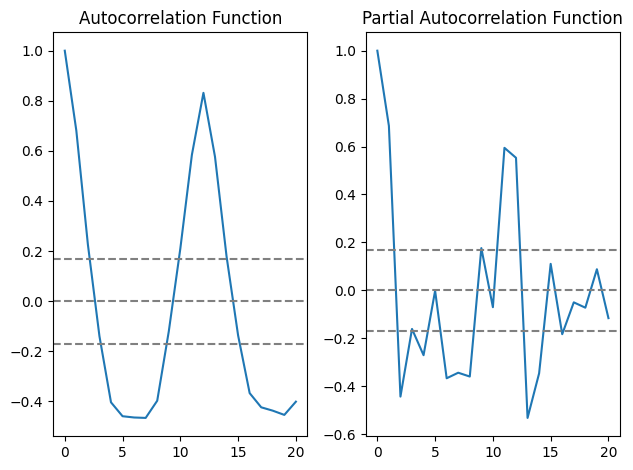

In [39]:
from statsmodels.tsa.stattools import acf,pacf

lag_acf =  acf(data_logscale_diff,nlags=20)
lag_pacf = pacf(data_logscale_diff,nlags=20,method='ols')

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_logscale_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_logscale_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_logscale_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_logscale_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

(144,)
Month
1949-01    4.718499
1949-02    4.770685
1949-03    4.882802
1949-04    4.859812
1949-05    4.795791
Freq: M, Name: Log_Passengers, dtype: float64


TypeError: float() argument must be a string or a real number, not 'Period'

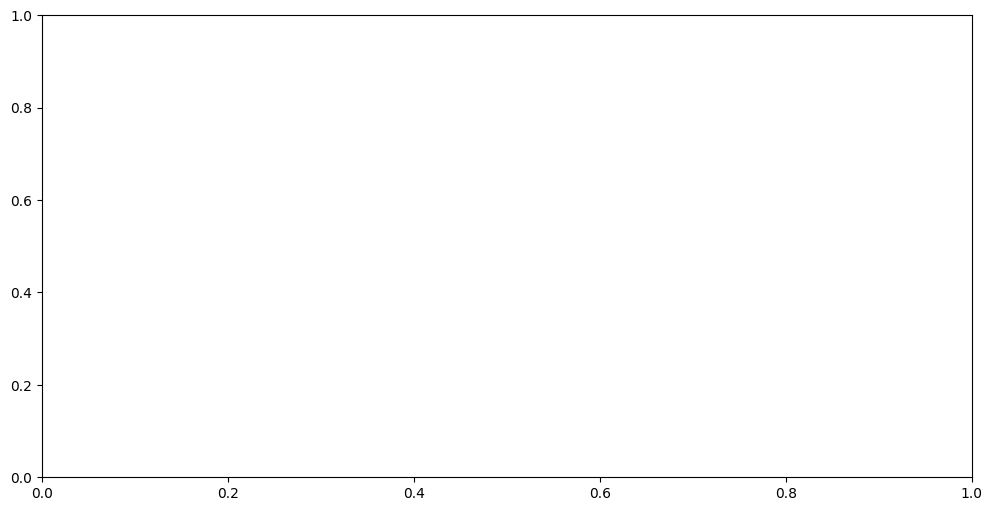

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load your dataset
data = pd.read_csv('/content/AirPassengers.csv')

# Ensure the 'Month' column is parsed as datetime and set as the index
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data.set_index('Month', inplace=True)

# Set the frequency of the datetime index to 'MS' (month start)
data.index = data.index.to_period('M')

# Convert the '#Passengers' column to a logarithmic scale
data['Log_Passengers'] = np.log(data['#Passengers'])

# Ensure the log-transformed data is a univariate series
data_logscale = data['Log_Passengers']

# Confirm the shape and type of data_logscale
print(data_logscale.shape)
print(data_logscale.head())

# Fit the ARIMA model
model = ARIMA(data_logscale, order=(2, 1, 2))
results_ARIMA = model.fit()

# Align the fitted values with the original data index
fitted_values = pd.Series(results_ARIMA.fittedvalues, index=data_logscale.index)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data_logscale, label='Log of #Passengers')
plt.plot(fitted_values, color='red', label='Fitted values')
plt.title('RSS: %.4f' % sum((fitted_values - data_logscale) ** 2))
plt.legend()
plt.show()

print('Plotting of ARIMA Model')


In [57]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


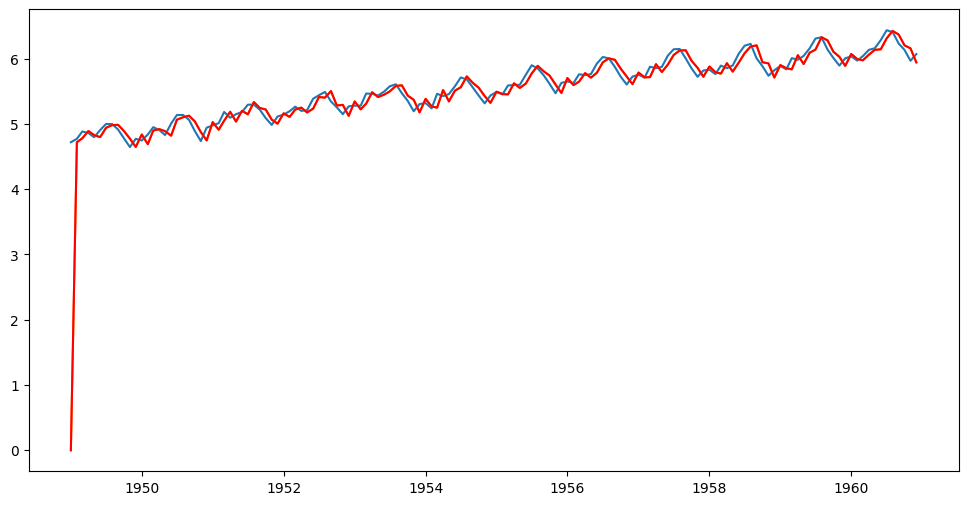

In [50]:
#MA Model

model=ARIMA(data_logscale,order=(0,1,2))
results_MA=model.fit()
fitted_values=pd.Series(results_MA.fittedvalues,index=data_logscale.index
                        )
data_logscale['forecast_MA']=fitted_values
plt.figure(figsize=(12,6))
plt.plot(data_logscale,label='Original')
plt.plot(data_logscale['forecast_MA'],color='red',label='Forecast')
plt.show()

In [52]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())


Month
1949-01-01    0.000000
1949-02-01    4.718499
1949-03-01    4.776385
1949-04-01    4.883216
1949-05-01    4.824421
dtype: float64


In [53]:
predictions_ARIMA_log = pd.Series(data_logscale['forecast_MA'].cumsum(), index=data_logscale.index)
predictions_ARIMA_log.head()

Month
1949-01-01     0.000000
1949-02-01     4.718499
1949-03-01     9.496909
1949-04-01    14.386436
1949-05-01    19.213209
Name: forecast_MA, dtype: float64

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


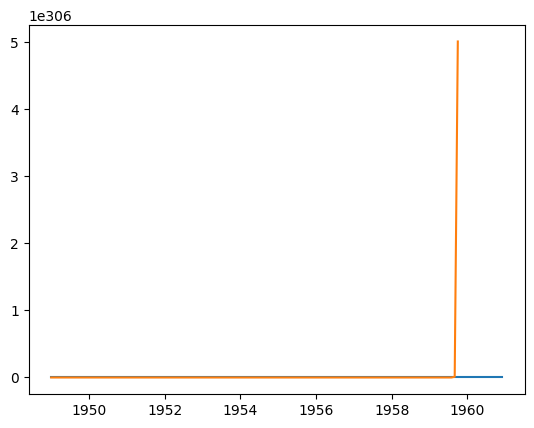

In [54]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(data)
plt.plot(predictions_ARIMA)